# Ⅰ. 탐색적 데이터 분석 (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. 정형화된 데이터의 요소
---
- **수치형(numeric)**: <ins>숫자</ins>를 이용해 표현할 수 있는 데이터
    - **연속형(continuous)**: <ins>일정 숫자 범위 안에서 어떤 값</ins>이든 취할 수 있는 데이터
        - 유의어 - 구간형, 실수형, 수치형 데이터
        - 예시 - 풍속, 지속 시간
    - **이산(discrete)**: 횟수와 같이 <ins>정수 값</ins>만 취할 수 있는 데이터
        - 유의어 - 정수형, 횟수 데이터
        - 예시 - 사건의 발생 빈도
- **범주형(categorical)**: <ins>가능한 범주 안의 값</ins>만을 취하는 데이터
    - **이진(binary)**: <ins>두 개의 값</ins>만을 갖는, 범주형 데이터의 특수한 경우
        - 유의어 - 이항적, 논리형, 지표(indicator), 불리언(boolean) 데이터
        - 예시 - 0/1, 예/아니오, 참/거짓
    - **순서형(ordinal)**: 값들 사이에 분명한 <ins>순위</ins>가 있는 범주형 데이터
        - 예시 - 수치로 나타낼 수 있는 평점

## 2. 테이블 데이터
---
- **데이터 프레임(data frame)**: 통계와 머신러닝 모델에서 가장 기본이 되는 테이블 형태의 데이터 구조
- **피처(feature)**: 일반적으로 테이블의 각 <ins>열(column)</ins>
    - 유의어 - 특징, 속성, 예측변수(predictor), 변수, 입력(input)
- **결과(outcome)**: 데이터 과학 프로젝트의 목표로 예측하고자 하는 것으로, 이를 위해 *피처*를 사용함
    - 유의어 - 종속변수, 목표, 출력(output)
- **레코드(record)**: 일반적으로 테이블의 각 <ins>행(row)</ins>
    - 유의어 - 기록값, 사건(case), 관측값, 패턴, 샘플
---
- [R의 데이터 종류](http://www.r-tutor.com/r-introduction/basic-data-types)
- [SQL 가이드 자료](https://www.w3schools.com/sql/sql_datatypes.asp)

### A. 데이터 프레임과 인덱스

```
※ 학문마다 서로 다른 용어를 사용함에 유의

예시 1
통계학자들은 *종속변수*를 예측하는 모델에서 *예측변수*라는 용어를 사용한다.
같은 상황에서 데이터 과학자들은 *목표*를 예측하는 데 *피처*를 사용한다고 표현한다.

예시 2
컴퓨터 과학과 정보공학에서 graph는 어떤 개체들 사이의 연결 관계를 묘사하는 도구이다.
통계학에서 graph는 그보다는 다양한 도표 혹은 시각화(visualization) 방법을 의미한다.
```

### B. 테이블 형식이 아닌 데이터 구조
---
- **시계열 데이터**: 동일한 변수 안에 연속적은 측정값을 가짐
- **공간 데이터**
    - 객체(object)
        - 어떤 객체와 그것의 공간 좌표가 중심이 됨
        - 예시 - 주택의 좌표
    - 필드(field) 정보
        - 공간을 나타내는 작은 단위들과 적당한 측정 기준값에 중점
        - 예시 - 픽셀의 밝기
- **그래프(or 네트워크) 데이터**: 물리적 관계, 사회적 관계 등 표현


## 3. 위치 추정
---
- **평균(mean)**: 모든 값의 총합을 개수로 나눈 값
    - 유의어 - 평균(average)
- **가중평균(weighted mean)**: 가중치를 곱한 값의 총합을 가중치의 총합으로 나누 값
- **중간값(median)**: 데이터에서 가장 가운데 위치한 값
- **백분위수(percentile)**: 전체의 P%를 아래에 두는 값
- **가중 중간값(weighted median):** 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- **절사평균(trimmed mean)**: 정해진 개수의 극단값을 제외한 나머지 값들의 평균
- **로버스트(robust)하다** = 극단값들에 민감하지 않다 = 저항성(resistant) 있다
- **특잇값(outlier)**: 대부분의 값과 매우 다른 데이터 값


```
통계학은 궁극적으로 불확실성을 이해하고자 하므로, 데이터로부터 계산된 값들에 "추정값(estimate)"이라는 용어를 사용한다.
데이터 과학은 구체적인 비즈니스나 조직의 목표치에 관심이 있으므로, 이러한 값들을 "측정 지표(metric)"이라고 부른다.
```

### A. 평균
---
- $평균=\bar{x}={\sum_{i=1}^n x_i \over n}$
- $절사평균=\bar{x}={\sum_{i=p+1}^{n-p} x_{(i)} \over {n-2p} }$
    - $x_1$이 가장 작은 값, $x_n$이 가장 큰 값
    - $p$개의 가장 크고 작은 값들을 제외
    - 극단값의 영향 제거
- $가중평균=\bar{x}_w={\sum_{i=1}^n w_ix_i \over \sum_{i=1}^n w_i}$
    - 어떤 값들이 본래 다른 값들에 비해 큰 변화량을 가질 때, 이러한 관측값에 대해 더 작은 가중치를 줄 수 있음
    - 데이터를 수집할 때 관심 있는 서로 다른 대조군에 대해서 항상 똑같은 수가 얻어지지는 않는데, 이를 보정하기 위해서 데이터가 부족한 소수 그룹에 대해 더 높은 가중치를 적용할 필요 있음

### B. 중간값과 로버스트 추정
---
- 중간값
- 가중 중간값
- 특잇값

```
이상 검출

전형적인 데이터 분석에서 특잇값은 가끔 유익한 정보를 제공하기도 하고, 때로는 골칫거리가 되기도 한다.
이상 검출에서는 대부분의 정상적인 데이터보다는 예외적으로 측정된 특잇값이 바로 주된 관심의 대상이다.
```

### C. 예제
---
인구에 따른 살인 비율의 위치 추정

In [ ]:
state = pd.read_csv('../data/state.csv')
print(state.head(8))

In [ ]:
# scipy.stats의 trim_mean
print(state['Population'].mean())
print(trim_mean(state['Population'], 0.1)) # 각 끝에서 10% 제외외
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [ ]:
# wquantiles
print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'],weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


## 4. 변이 추정
---
- **위치**: 데이터의 특징을 요약하는 다양한 요소 중 하나
- **변이(variability)**: 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도(dispersion)

- **편차**: 관측값과 위치 추정값 사이의 차이
- **분산**: 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값. n은 데이터 개수
- **표준편차**: 분산의 제곱근
- **평균절대편차**: 평균과의 편차 절댓값의 평균
- **중간값의 중위절대편차(MAD)**: 중간값과의 편차 절댓값의 중간값
- **범위**: 데이터의 최댓값과 최솟값의 차이
- **순서통계량**: 최소에서 최대까지 정렬된 데이터 값에 따른 계량형
- **백분위수**: 어떤 값들의 P%가 이 값 또는 더 작은 값을 갖고, (100-P)%가 이 값 또는 더 큰 값을 갖도록 하는 값
- **사분위범위(IQR)**: 75번째 백분위수와 25번째 백분위수 사이의 차이

### A. 표준편차와 관련 추정값들
---
- 평균절대편차
- 분산
- 표준편차

```
※ 자유도 n? n-1?
```

### B. 백분위수에 기초한 추정
---
- 백분위수

### C. 예제
---
주별 인구의 변이 추정

In [7]:
from statsmodels import robust

In [8]:
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(robust.scale.mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


## 5. 데이터 분포 탐색
---
- **상자그림**: 투키가 데이터의 분포를 시각화 하기 위한 간단한 방법으로 소개한 그림
- **도수분포표**: 어떤 구간(빈)에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- **히스토그램**: x축은 구간 y축은 빈도수를 나타내는 도수 테이블의 그림
- **밀도 그림**: 히스토그램을 부드러운 곡선으로 나타내느 그림. 커널밀도추정(KDE)을 주로 사용함

### A. 백분위수와 상자그림

In [12]:
import matplotlib.pyplot as plt

In [13]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [16]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


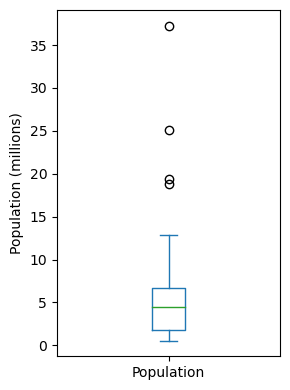

In [14]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

### B. 도수분포표와 히스토그램

In [15]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


```
구간의 크기를 바꿔보는 것도 유용한 정보를 얻는 좋은 방법이다.
만약 크기가 너무 크면 분포를 나타내는 중요한 특징을 놓칠 수 있다.
반대로 너무 작아도 결과가 너무 쪼개져 있어서 더 큰 그림을 볼 수가 없게 된다.
```

In [17]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

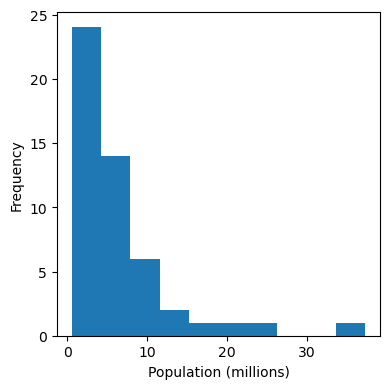

In [18]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

```
통계학에서 말하는 모멘트
```

### C. 밀도 그림과 추정

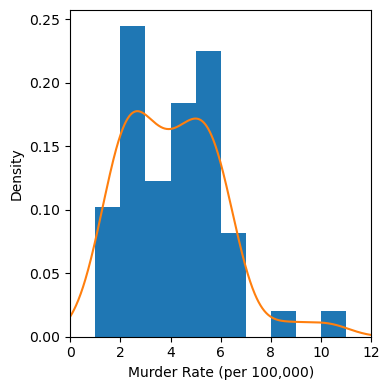

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

```
밀도추정은 기본 함수를 사용하는 것으로도 충분함
```

## 2. 이진 데이터와 범주 데이터 탐색하기
---
- 최빈값: 데이터에서 가장 자주 등장하는 범주 혹은 값
- 기댓값: 범주에 해당하는 어떤 수치가 있을 때 범주의 출현 확률에 따른 평균
- 막대도표: 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
- 파이그림: 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

### A. 최빈값

### B. 기댓값

### C. 확률

## 7. 상관관계
---
- 상관계수: 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량 (-1 ~ +1)
- 상관행렬: 행과 열이 변수들을 의미하는 표
- 산점도: x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

In [24]:
import seaborn as sns

sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
sp500_px = pd.read_csv('../data/sp500_data.csv', index_col=0)

In [25]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

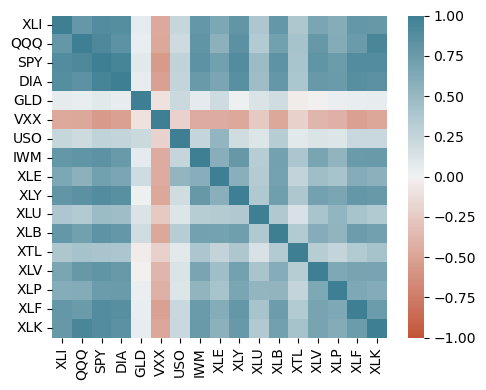

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()